In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('CSATmean.xlsx')
#preview the first 5 rows
# convert the Raw number of tesponses to integer, if is not empty
df['Raw number of responses'] = df['Raw number of responses'].fillna(0).astype(int)
# in the column "Date" shorten the date so that the year has only 2 digits as mm-yy
df['Date'] = df['Date'].dt.strftime('%m-%y')

# display the table
df

,Group,Date,Raw number of responses,Release,CSAT,Mean,Std,Sterr
0,Internal,09-22,48,NaN,29.0,3.02,0.999,0.144193
1,Internal,12-22,36,NaN,28.0,3.17,0.759,0.126500
2,Internal,03-23,54,NaN,47.0,3.35,0.914,0.124380
3,Internal,06-23,50,NaN,21.0,2.78,0.975,0.137886
4,Internal,09-23,31,NaN,23.0,2.81,0.873,0.156795
5,Internal,12-23,0,NaN,NaN,NaN,NaN,NaN
6,Internal,03-24,0,NaN,NaN,NaN,NaN,NaN
7,Internal,06-24,0,NaN,NaN,NaN,NaN,NaN
8,Internal,09-24,0,NaN,NaN,NaN,NaN,NaN
9,Internal,12-24,0,NaN,NaN,NaN,NaN,NaN


In [15]:
#create three dataframes, one for External, one for Internal, one for CFE according to the first column
df_external = df[df['Group'] == 'External']
df_internal = df[df['Group'] == 'Internal']
df_CFE = df[df['Group'] == 'CFE']
df_CFE

,Group,Date,Raw number of responses,Release,CSAT,Mean,Std,Sterr
22,CFE,NaN,7,22b PR,43.0,3.33,0.820,0.309931
23,CFE,NaN,18,22b GR,44.0,NaN,NaN,NaN
24,CFE,NaN,18,23a GR,44.0,2.94,1.110,0.261630
25,CFE,NaN,16,23b PR,62.5,3.38,1.088,0.272000
26,CFE,NaN,0,23b GR,NaN,NaN,NaN,NaN
27,CFE,NaN,0,24a PR,NaN,NaN,NaN,NaN
28,CFE,NaN,0,24a GR,NaN,NaN,NaN,NaN
29,CFE,NaN,0,24b PR,NaN,NaN,NaN,NaN
30,CFE,NaN,0,24b GR,NaN,NaN,NaN,NaN
31,CFE,NaN,0,25a PR,NaN,NaN,NaN,NaN


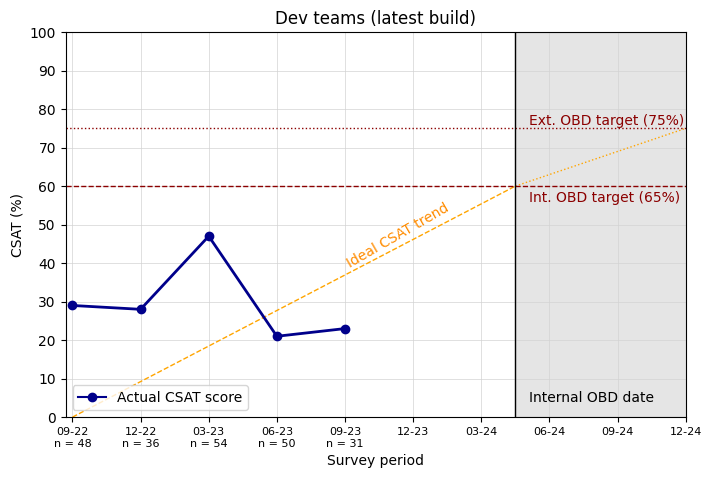

In [16]:
#Create a plot of the CSAT for Group = internal
plt.figure(figsize=(8,5))
plt.plot([0, 6.5], [0, 60], color='orange', linestyle='--', linewidth=1)
plt.plot([6.5, 9], [60, 75], color='orange', linestyle=':', linewidth=1)

plt.text(4, 39, 'Ideal CSAT trend', color='darkorange', rotation=30)
plt.axhline(y=60, color='darkred', linestyle='--', linewidth=1)
plt.text(6.7, 56, 'Int. OBD target (65%)', color='darkred')
plt.axhline(y=75, color='darkred', linestyle=':', linewidth=1)
plt.text(6.7, 76, 'Ext. OBD target (75%)', color='darkred')

plt.plot(df_internal['Date'], df_internal['CSAT'], color='darkblue', marker='o', linewidth=2)
plt.xticks(df_internal['Date'])
plt.xlabel('Survey period')
plt.ylabel('CSAT (%)')
plt.gca().set_xticklabels(df_internal['Date'], ha='center')
plt.title('Dev teams (latest build)')
plt.gca().set_xticklabels(df_internal['Date'] + '\n' + 'n = ' + df_internal['Raw number of responses'].astype(str), ha='center')
plt.gca().set_xticklabels(np.where(df_internal['CSAT'].isnull(), df_internal['Date'], df_internal['Date'] + '\n' + 'n = ' + df_internal['Raw number of responses'].astype(str)), ha='center')
plt.ylim(0, 90)

plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
plt.yticks(np.arange(0, 101, 10))
plt.xlim(-0.1, len(df_internal['Date'])-1)

lines = [plt.plot([], [], color='darkblue', marker='o')[0]]
labels = ['Actual CSAT score']
plt.legend(lines, labels, loc='lower left')
plt.xticks(fontsize=8)
plt.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
plt.axvspan(6.5, 12.5, alpha=0.2, color='grey')
plt.text(6.7,4, 'Internal OBD date', color='black')
plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
plt.show()

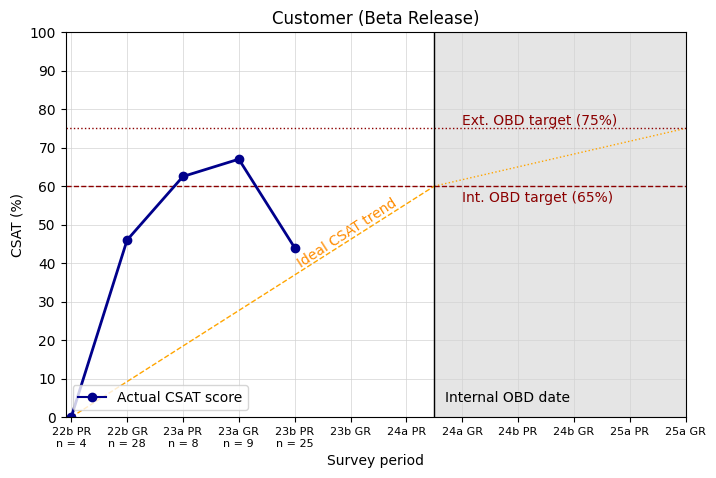

In [17]:
#Create a plot of the CSAT for Group = external
plt.figure(figsize=(8,5))
plt.plot([0, 6.5], [0, 60], color='orange', linestyle='--', linewidth=1)
plt.plot([6.5, 11], [60, 75], color='orange', linestyle=':', linewidth=1)

plt.text(4, 39, 'Ideal CSAT trend', color='darkorange', rotation=33)
plt.axhline(y=60, color='darkred', linestyle='--', linewidth=1)
plt.text(7, 56, 'Int. OBD target (65%)', color='darkred')
plt.axhline(y=75, color='darkred', linestyle=':', linewidth=1)
plt.text(7, 76, 'Ext. OBD target (75%)', color='darkred')

plt.plot(df_external['Release'], df_external['CSAT'], color='darkblue', marker='o', linewidth=2)
plt.xticks(df_external['Release'])
plt.xlabel('Survey period')
plt.ylabel('CSAT (%)')
plt.gca().set_xticklabels(df_external['Release'], ha='center')
plt.title('Customer (Beta Release)')
plt.gca().set_xticklabels(df_external['Release'] + '\n' + 'n = ' + df_external['Raw number of responses'].astype(str), ha='center')
plt.gca().set_xticklabels(np.where(df_external['CSAT'].isnull(), df_external['Release'], df_external['Release'] + '\n' + 'n = ' + df_external['Raw number of responses'].astype(str)), ha='center')
plt.ylim(0, 90)
plt.xlim(-0.1, len(df_external['Release'])-1)

plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
plt.yticks(np.arange(0, 101, 10))

lines = [plt.plot([], [], color='darkblue', marker='o')[0]]
labels = ['Actual CSAT score']
plt.legend(lines, labels, loc='lower left')
plt.xticks(fontsize=8)
plt.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
plt.axvspan(6.5, 12.5, alpha=0.2, color='grey')
plt.text(6.7,4, 'Internal OBD date', color='black')
plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
plt.show()

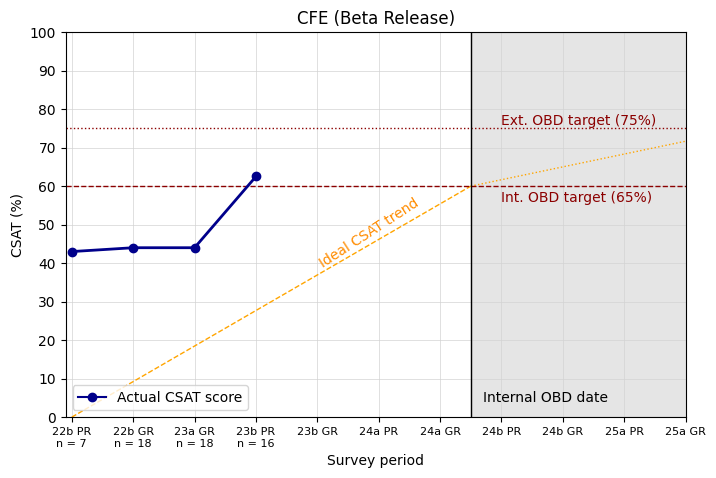

In [18]:
#Create a plot of the CSAT for Group = CFE
plt.figure(figsize=(8,5))
plt.plot([0, 6.5], [0, 60], color='orange', linestyle='--', linewidth=1)
plt.plot([6.5, 11], [60, 75], color='orange', linestyle=':', linewidth=1)

plt.text(4, 39, 'Ideal CSAT trend', color='darkorange', rotation=33)
plt.axhline(y=60, color='darkred', linestyle='--', linewidth=1)
plt.text(7, 56, 'Int. OBD target (65%)', color='darkred')
plt.axhline(y=75, color='darkred', linestyle=':', linewidth=1)
plt.text(7, 76, 'Ext. OBD target (75%)', color='darkred')

plt.plot(df_CFE['Release'], df_CFE['CSAT'], color='darkblue', marker='o', linewidth=2)
plt.xticks(df_CFE['Release'])
plt.xlabel('Survey period')
plt.ylabel('CSAT (%)')
plt.gca().set_xticklabels(df_CFE['Release'], ha='center')
plt.title('CFE (Beta Release)')
plt.gca().set_xticklabels(df_CFE['Release'] + '\n' + 'n = ' + df_CFE['Raw number of responses'].astype(str), ha='center')
plt.gca().set_xticklabels(np.where(df_CFE['CSAT'].isnull(), df_CFE['Release'], df_CFE['Release'] + '\n' + 'n = ' + df_CFE['Raw number of responses'].astype(str)), ha='center')
plt.ylim(0, 90)
plt.xlim(-0.1, len(df_CFE['Release'])-1)

plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
plt.yticks(np.arange(0, 101, 10))

lines = [plt.plot([], [], color='darkblue', marker='o')[0]]
labels = ['Actual CSAT score']
plt.legend(lines, labels, loc='lower left')
plt.xticks(fontsize=8)
plt.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
plt.axvspan(6.5, 12.5, alpha=0.2, color='grey')
plt.text(6.7,4, 'Internal OBD date', color='black')
plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
plt.show()

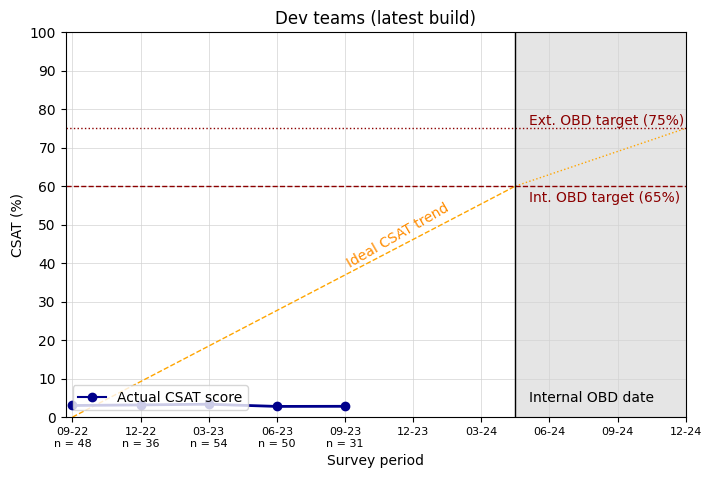

In [ ]:
#Create a plot of the CSAT for Group = internal
plt.figure(figsize=(8,5))
plt.plot([0, 6.5], [0, 60], color='orange', linestyle='--', linewidth=1)
plt.plot([6.5, 9], [60, 75], color='orange', linestyle=':', linewidth=1)

plt.text(4, 39, 'Ideal CSAT trend', color='darkorange', rotation=30)
plt.axhline(y=60, color='darkred', linestyle='--', linewidth=1)
plt.text(6.7, 56, 'Int. OBD target (65%)', color='darkred')
plt.axhline(y=75, color='darkred', linestyle=':', linewidth=1)
plt.text(6.7, 76, 'Ext. OBD target (75%)', color='darkred')

plt.plot(df_internal['Date'], df_internal['Mean'], color='darkblue', marker='o', linewidth=2)
plt.xticks(df_internal['Date'])
plt.xlabel('Survey period')
plt.ylabel('CSAT (%)')
plt.gca().set_xticklabels(df_internal['Date'], ha='center')
plt.title('Dev teams (latest build)')
plt.gca().set_xticklabels(df_internal['Date'] + '\n' + 'n = ' + df_internal['Raw number of responses'].astype(str), ha='center')
plt.gca().set_xticklabels(np.where(df_internal['CSAT'].isnull(), df_internal['Date'], df_internal['Date'] + '\n' + 'n = ' + df_internal['Raw number of responses'].astype(str)), ha='center')
plt.ylim(0, 5)

plt.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
plt.yticks(np.arange(0, 101, 10))
plt.xlim(-0.1, len(df_internal['Date'])-1)

lines = [plt.plot([], [], color='darkblue', marker='o')[0]]
labels = ['Actual CSAT score']
plt.legend(lines, labels, loc='lower left')
plt.xticks(fontsize=8)
plt.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
plt.axvspan(6.5, 12.5, alpha=0.2, color='grey')
plt.text(6.7,4, 'Internal OBD date', color='black')
plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
plt.show()